In [1]:
from dyn_net.networks import get_network
import networkx as nx
from scipy.sparse.linalg import eigsh

In [ ]:
# ER
N_list = [1000, 2000, 4000, 8000]
records = []
for N in N_list:
    ER_params = {
        'n' : N,
        'p' : 0.5
    }
    build, p = get_network("erdos_renyi",ER_params)
    A = build(p)
    vals, vecs = eigsh(A/N, k=1, which="LA")  
    avg_deg = A.nnz / N
    density = A.nnz / (N * N)
    records.append((N, avg_deg, density, vals[0]))

print("N, avg_deg, density, eigenvalue")
for N, avg_deg, density, eig in records:
    print(N, avg_deg, density, eig)


In [ ]:
# WS
N_list = [1000, 2000, 4000, 8000]
records = []
for N in N_list:
    WS_params = {
        'n' : N,
        'k' : N/2
    }
    build, p = get_network("watts_strogatz",WS_params)
    A = build(p)
    vals, vecs = eigsh(A/N, k=1, which="LA")  
    avg_deg = A.nnz / N
    density = A.nnz / (N * N)
    records.append((N, avg_deg, density, vals[0]))

print("N, avg_deg, density, eigenvalue")
for N, avg_deg, density, eig in records:
    print(N, avg_deg, density, eig)


In [ ]:
# Power Law
N_list = [1000, 2000, 4000, 8000]
records = []
for N in N_list:
    power_law_params = {
        'n' : N,
        'alpha' : 0.3,
        'beta' : 0.4
    }
    build, p = get_network("power_law",power_law_params)
    A = build(p)
    vals, vecs = eigsh(A/N/N**(-power_law_params["beta"]), k=1, which="LA")  
    avg_deg = A.nnz / N
    density = A.nnz / (N * N)
    records.append((N, avg_deg, density, vals[0]))

print("N, avg_deg, density, eigenvalue")
for N, avg_deg, density, eig in records:
    print(N, avg_deg, density, eig)


In [ ]:
# Bistable graphon
N_list = [1000, 2000, 4000, 8000]
records = []
for N in N_list:
    params = {"n": N, "seed": 0}
    build, p = get_network("bistable_graphon", params)
    A = build(p)
    vals, vecs = eigsh(A/N, k=1, which="LA") 
    avg_deg = A.nnz / N
    density = A.nnz / (N * N)
    records.append((N, avg_deg, density, vals[0]))

print("N, avg_deg, density, eigenvalue")
for N, avg_deg, density, eig in records:
    print(N, avg_deg, density, eig)


### Configuration model networks

1. Poisson

In [ ]:
network_name = "configuration_model"

degree_distribution = {
    'name' : "poisson",
    'params' : {
        'lambda' : 500
    }
} 

N_list = [500, 1000, 2000, 4000, 8000]
records = []
for N in N_list:
    network_params = {
        'n' : N,
        'degree_distribution': degree_distribution
        }

    build, params = get_network(network_name,network_params)
    A = build(params)

    vals, vecs = eigsh(A/N, k=1, which="LA") 
    avg_deg = A.nnz / N
    density = A.nnz / (N * N)
    records.append((N, avg_deg, density, vals[0]))

print("N, avg_deg, density, eigenvalue")
for N, avg_deg, density, eig in records:
    print(N, avg_deg, density, eig)


In [6]:
network_name = "configuration_model"

degree_distribution = {
    'name' : "scale_free_cutoff",
    'params' : {
        'alpha' : 2.5,
        'k_min' : 1,
        'k_max' : 100
    }
} 

N_list = [500, 1000, 2000, 4000, 8000]
records = []
for N in N_list:
    network_params = {
        'n' : N,
        'degree_distribution': degree_distribution
        }

    build, params = get_network(network_name,network_params)
    A = build(params)

    vals, vecs = eigsh(A.astype(float), k=1, which="LA") 
    avg_deg = A.nnz / N
    density = A.nnz / (N * N)
    records.append((N, avg_deg, density, vals[0]))

print("N, avg_deg, density, eigenvalue")
for N, avg_deg, density, eig in records:
    print(N, avg_deg, density, eig)


N, avg_deg, density, eigenvalue
500 1.702 0.003404 5.8889220533344435
1000 1.655 0.001655 10.370583248824454
2000 1.784 0.000892 6.965815259400966
4000 1.749 0.00043725 10.257937902099494
8000 1.785375 0.000223171875 9.85657854295876


In [7]:
network_name = "configuration_model"

degree_distribution = {
    'name' : "scale_free_exp_cutoff",
    'params' : {
        'alpha' : 2.5,
        'xi' : 20.0,
        'k_min' : 1,
        'k_max' : 100
    }
} 

N_list = [500, 1000, 2000, 4000, 8000]
records = []
for N in N_list:
    network_params = {
        'n' : N,
        'degree_distribution': degree_distribution
        }

    build, params = get_network(network_name,network_params)
    A = build(params)

    vals, vecs = eigsh(A/N, k=1, which="LA") 
    avg_deg = A.nnz / N
    density = A.nnz / (N * N)
    records.append((N, avg_deg, density, vals[0]))

print("N, avg_deg, density, eigenvalue")
for N, avg_deg, density, eig in records:
    print(N, avg_deg, density, eig)


N, avg_deg, density, eigenvalue
500 1.504 0.003008 0.00930374592488847
1000 1.524 0.001524 0.005625539629617211
2000 1.651 0.0008255 0.003600084677900487
4000 1.51925 0.0003798125 0.0019002354827313004
8000 1.515125 0.000189390625 0.0008528439071872901


### Configuration Model

0.012
494


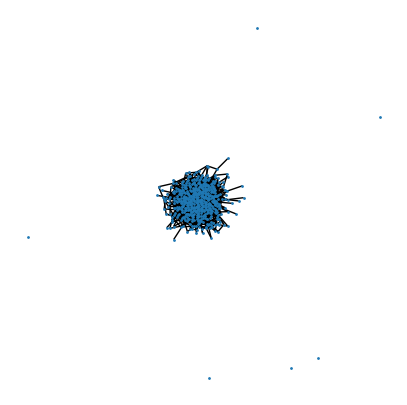

In [44]:
# Configuration model with Poisson degree distribution
import numpy as np
import networkx as nx
from dyn_net.networks.configuration_model import ConfigurationModelParams, DegreeDistributionSpec, build
from matplotlib import pyplot as plt

network_name = "configuration_model"
size = 500
degree_distribution = {
    'name' : "poisson",
    'params' : {
        'lambda' : 5
    }
} 

network_params = {
    'n' : size,
    'degree_distribution': degree_distribution
}


build_net, p_net = get_network(network_name, network_params)

A = build(p_net)
G = nx.from_scipy_sparse_array(A)

pos = nx.spring_layout(G, seed=1)
plt.figure(figsize=(5, 5))
nx.draw_networkx(G, pos=pos, node_size=1, with_labels=False)
plt.axis("off")
isolates = [n for n, d in G.degree() if d == 0]
print( len(isolates) / size )
components = list(nx.connected_components(G))
giant_size = max(len(c) for c in components)
print(giant_size)



### Truncated Power Law

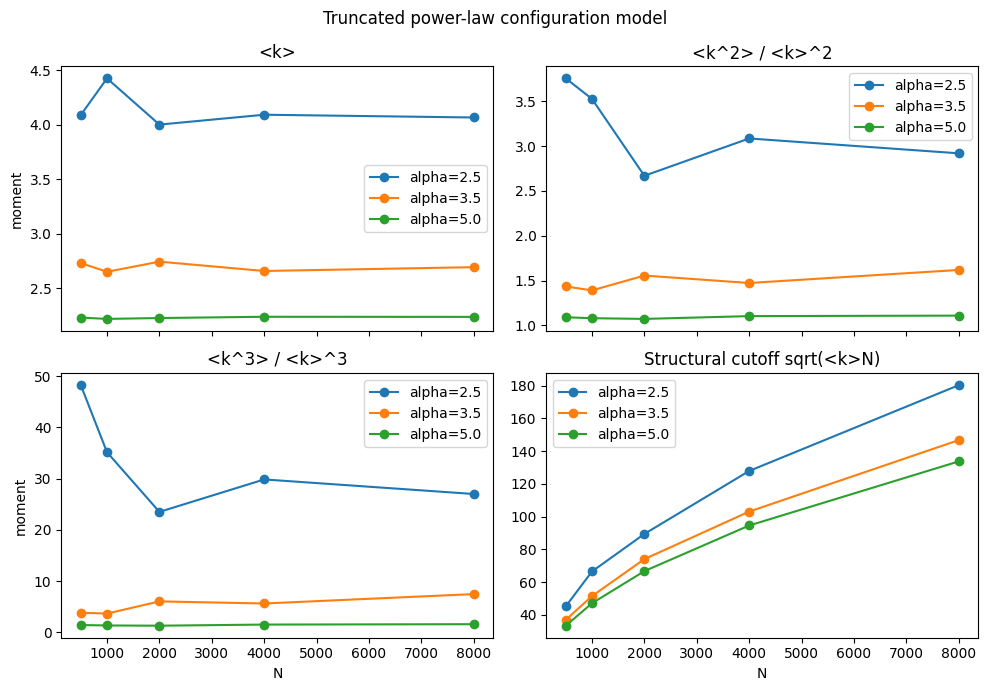

In [5]:
# Configuration model with truncated power-law (scale_free_cutoff) degree distribution
import numpy as np
from matplotlib import pyplot as plt
from dyn_net.networks import get_network

alphas = [2.5, 3.5, 5.0]
k_min = 2
k_max = 100
N_list = [500, 1000, 2000, 4000, 8000]

results = {}
for alpha in alphas:
    degree_distribution = {
        'name' : 'scale_free_cutoff',
        'params' : {
            'alpha' : alpha,
            'k_min' : k_min,
            'k_max' : k_max
        }
    }

    records = []
    for N in N_list:
        network_params = {
            'n' : N,
            'degree_distribution': degree_distribution
        }
        build, params = get_network('configuration_model', network_params)
        A = build(params)
        degrees = np.asarray(A.sum(axis=1)).ravel()
        m1 = degrees.mean()
        m2 = (degrees ** 2).mean()
        m3 = (degrees ** 3).mean()
        structural_cutoff = np.sqrt(m1 * N)
        records.append((N, m1, m2, m3, structural_cutoff))
    results[alpha] = records


# Plot moments and structural cutoff vs N
fig, axes = plt.subplots(2, 2, figsize=(10, 7), sharex=True)
for alpha in alphas:
    data = results[alpha]
    Ns = np.array([r[0] for r in data])
    m1s = np.array([r[1] for r in data])
    m2s = np.array([r[2] for r in data])
    m3s = np.array([r[3] for r in data])
    k_structs = np.array([r[4] for r in data])

    axes[0, 0].plot(Ns, m1s, marker='o', label=f'alpha={alpha}')
    axes[0, 1].plot(Ns, m2s / m1s**2, marker='o', label=f'alpha={alpha}')
    axes[1, 0].plot(Ns, m3s / m1s**3, marker='o', label=f'alpha={alpha}')
    axes[1, 1].plot(Ns, k_structs, marker='o', label=f'alpha={alpha}')

axes[0, 0].set_title('<k>')
axes[0, 0].set_ylabel('moment')
axes[0, 1].set_title('<k^2> / <k>^2')
axes[1, 0].set_title('<k^3> / <k>^3')
axes[1, 0].set_xlabel('N')
axes[1, 0].set_ylabel('moment')
axes[1, 1].set_title('Structural cutoff sqrt(<k>N)')
axes[1, 1].set_xlabel('N')

for ax in axes.ravel():
    ax.legend()

fig.suptitle('Truncated power-law configuration model')
fig.tight_layout()
